## Data and setup

## Import numpy and pandas

In [2]:
import numpy as np
import pandas as pd

## Import visualization libraries and set %matplotlib inline.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

## Read in the csv file as a dataframe called df

In [29]:
df = pd.read_csv("/Users/kapilsharma/Desktop/DATA Analytics/Capstone Project/911.csv")

## Check the info() of the df

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


## Check the head of df

In [31]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


# Basic Questions

## What are the top 5 zipcodes for 911 calls?

In [32]:
df['zip'].value_counts().sort_values(ascending=False).head(5)


19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

## What are the top 5 townships for 911 calls?

In [33]:
df['twp'].value_counts().sort_values(ascending=False).head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

## Take a look at the 'title' column, how many unique title codes are there?

In [34]:
df['title'].nunique()

110

# Creating new features

### In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.
For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.

In [35]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS


## What is the most common Reason for a 911 call based off of this new column?


In [36]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

## Now use seaborn to create a countplot of 911 calls by Reason.

<AxesSubplot:xlabel='Reason', ylabel='count'>

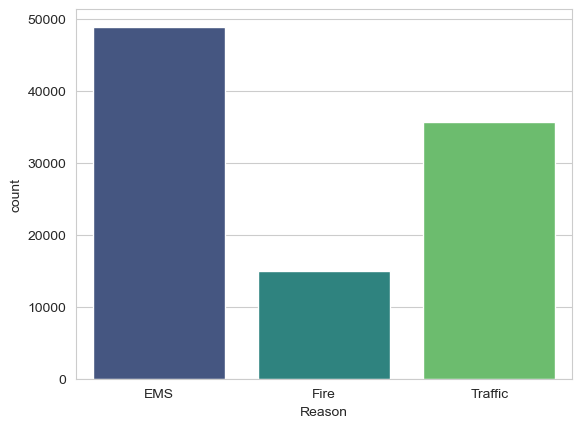

In [37]:
import warnings
warnings.filterwarnings("ignore")
sns.countplot('Reason',data=df,palette='viridis')

## Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?


In [38]:
df['timeStamp'].apply(type).iloc[0]

str

## You should have seen that these timestamps are still strings. Use pd.to_datetime to convert the column from strings to DateTime objects.

In [39]:
pd.to_datetime(df['timeStamp'])

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

### You can now grab specific attributes from a Datetime object by calling them. For example: You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.

In [40]:
# Convert the 'timeStamp' column to DateTime objects
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

# Create a new column 'Hour' based on the 'timeStamp' column
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

# Create a new column 'Month' based on the 'timeStamp' column
df['Month'] = df['timeStamp'].apply(lambda time: time.month)

# Create a new column 'Day of Week' based on the 'timeStamp' column
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [41]:
df['Hour']

0        17
1        17
2        17
3        17
4        17
         ..
99487    11
99488    11
99489    11
99490    11
99491    11
Name: Hour, Length: 99492, dtype: int64

In [42]:
df['Month']

0        12
1        12
2        12
3        12
4        12
         ..
99487     8
99488     8
99489     8
99490     8
99491     8
Name: Month, Length: 99492, dtype: int64

In [43]:
df['Day of Week']

0        3
1        3
2        3
3        3
4        3
        ..
99487    2
99488    2
99489    2
99490    2
99491    2
Name: Day of Week, Length: 99492, dtype: int64

## Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:

In [44]:
dmap = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

df['Day of Week'] = df['Day of Week'].map(dmap)

In [45]:
df['Day of Week']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day of Week, Length: 99492, dtype: object

## Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.


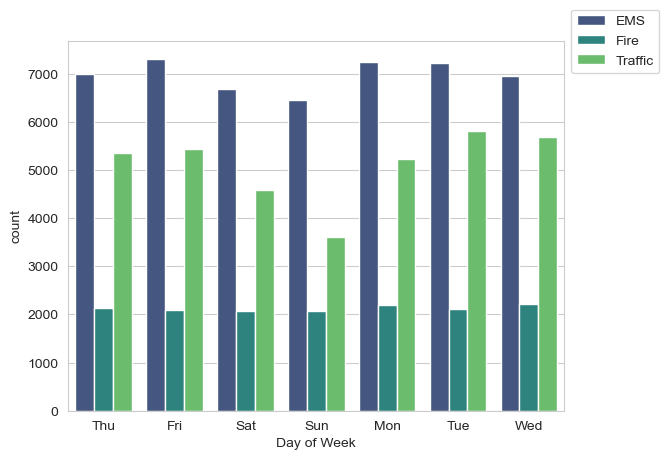

In [46]:
sns.countplot(x='Day of Week', data=df, hue='Reason', palette='viridis')
plt.legend(loc='center left', bbox_to_anchor=(1, 1))



## Now do the same for Month:

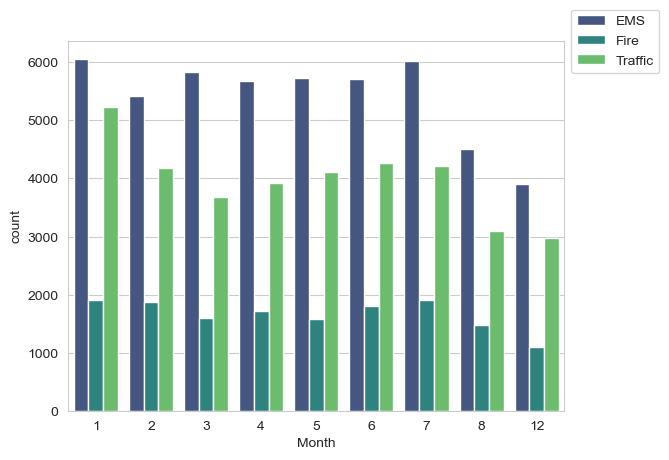

In [47]:
sns.countplot(x='Month', data=df, hue='Reason', palette='viridis')
plt.legend(loc='center left', bbox_to_anchor=(1, 1))

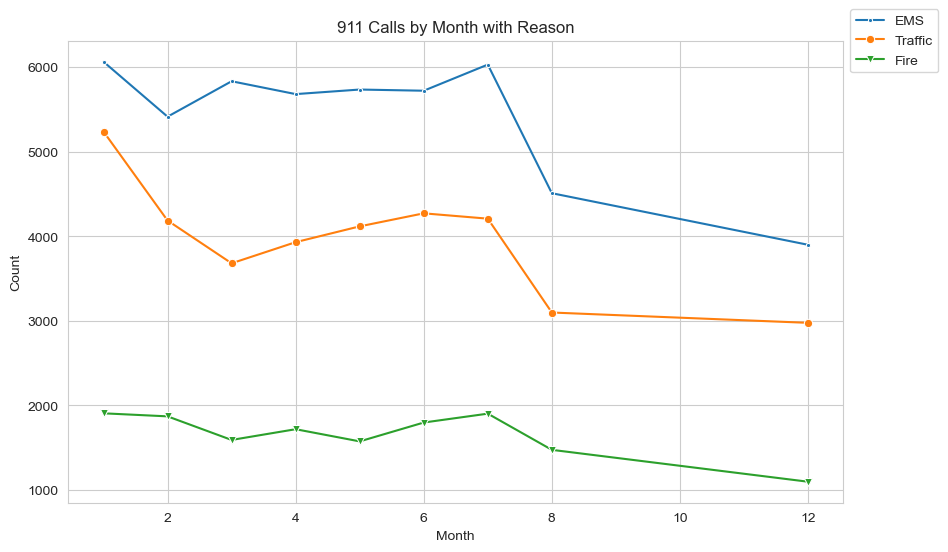

In [48]:
monthly_counts = df.groupby(['Month', 'Reason']).size().unstack().fillna(0)

# Reset the index to make 'Month' a regular column
monthly_counts = monthly_counts.reset_index()

# Set the style and figure size (adjust as needed)
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Create a line plot to visualize the counts by month
sns.lineplot(x='Month', y='EMS', data=monthly_counts, label='EMS', marker='.')
sns.lineplot(x='Month', y='Traffic', data=monthly_counts, label='Traffic', marker='o')
sns.lineplot(x='Month', y='Fire', data=monthly_counts, label='Fire', marker='v')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('911 Calls by Month with Reason')

# Set the legend in the best position
plt.legend(loc='center left', bbox_to_anchor=(1, 1))



## Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.

In [49]:
# Create a groupby object 'byMonth' and use count() for aggregation
df.groupby('Month').count().head()



,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


## Create a simple plot off of the dataframe indicating the count of calls per month.


In [50]:
from datetime import datetime


In [51]:
byMonth['twp'].plot()

# Add x label
plt.xlabel('Month')




NameError: name 'byMonth' is not defined

## See if you can use seaborn's lmplot() to create a linear fit on the number of calls per month.

In [52]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

plt.ylim(6000, 15000)

plt.xlabel('Month')
plt.ylabel('twp')


NameError: name 'byMonth' is not defined

## Create a new column called 'Date' that contains the date from the timeStamp column.

In [53]:
df['Date'] = df['timeStamp'].dt.date


In [54]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,11,8,Wed,2016-08-24
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,11,8,Wed,2016-08-24
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11,8,Wed,2016-08-24
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,11,8,Wed,2016-08-24


## Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.

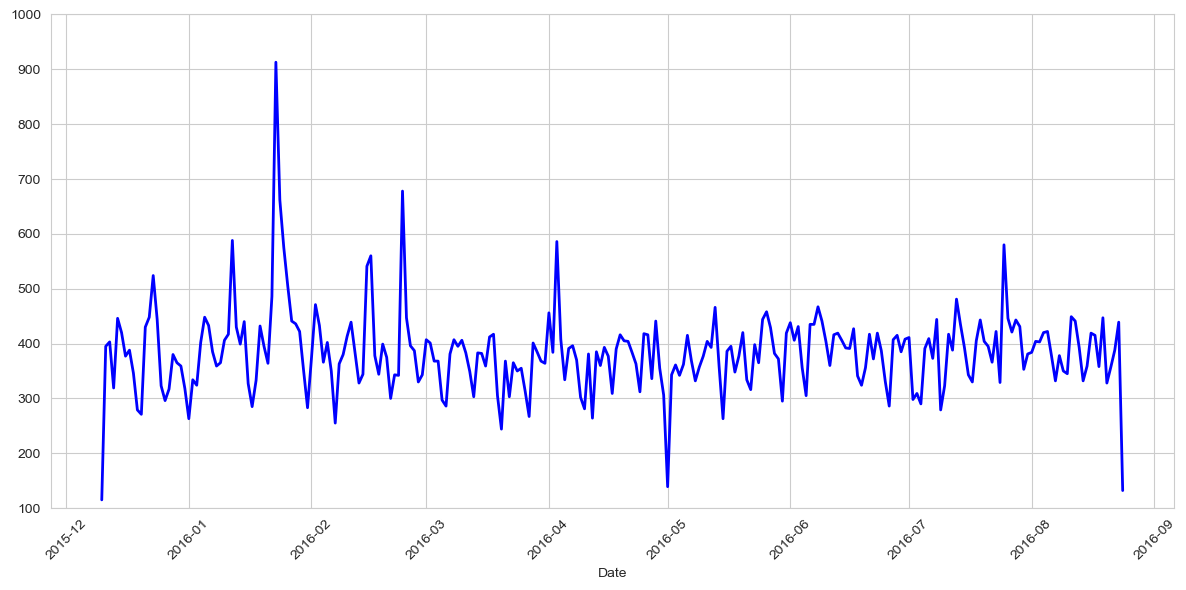

In [55]:
byDate = df.groupby('Date').count()
plt.figure(figsize=(12, 6))  

plt.ylim(100, 1000)


plt.plot(byDate.index, byDate['twp'], color='b', lw=2)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()

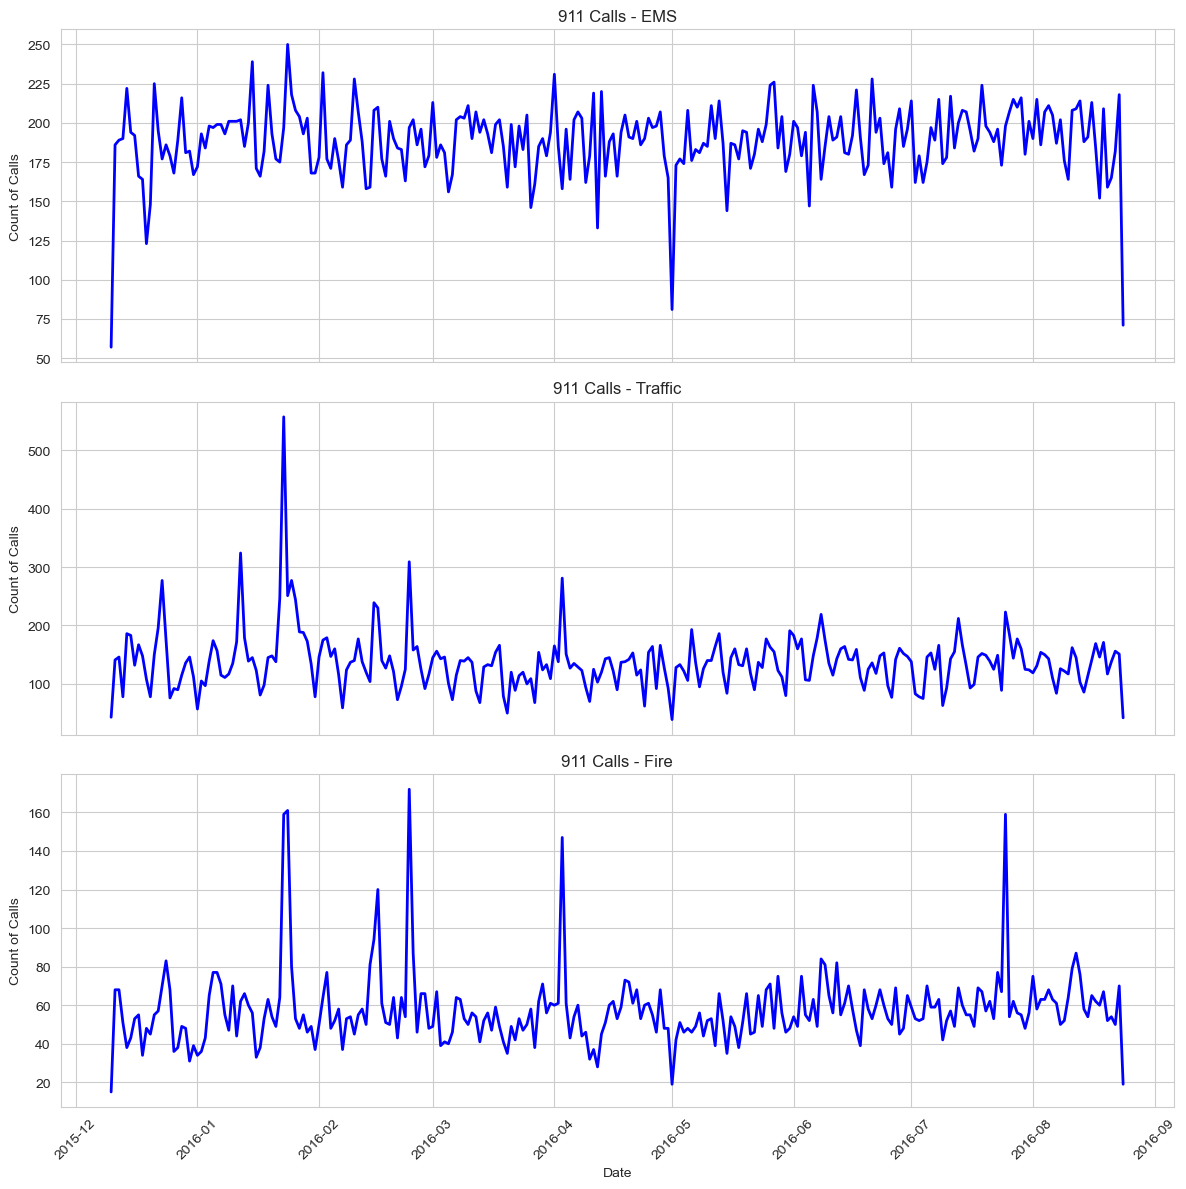

In [56]:
byDateReason = df.groupby(['Date', 'Reason']).count().unstack()

# Create three separate plots for each Reason
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 12), sharex=True)

# Plot each Reason separately
for i, reason in enumerate(['EMS', 'Traffic', 'Fire']):
    axes[i].plot(byDateReason.index, byDateReason['twp'][reason], color='b', lw=2)
    axes[i].set_title(f'911 Calls - {reason}')
    axes[i].set_ylabel('Count of Calls')

# Set a common x-axis label
axes[-1].set_xlabel('Date')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### Now let's move on to creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.

In [59]:
pivot_df = df.pivot_table(index='Day of Week', columns='Hour', values='Reason', aggfunc='count')
pivot_df

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


## Now create a HeatMap using this new DataFrame.

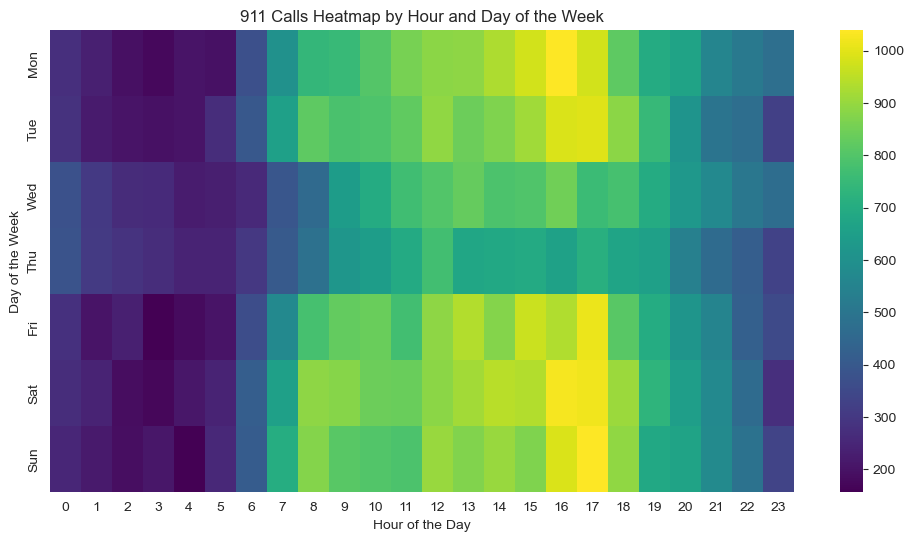

In [60]:
# Create a pivot table to restructure the data
heatmap_data = df.groupby(['Day of Week', 'Hour']).count()['Reason'].unstack()

# Define the order of days of the week for the heatmap
days_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='viridis', yticklabels=days_order)

# Add labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.title('911 Calls Heatmap by Hour and Day of the Week')

# Show the heatmap
plt.show()

## Now create a clustermap using this DataFrame.

<Figure size 1200x800 with 0 Axes>

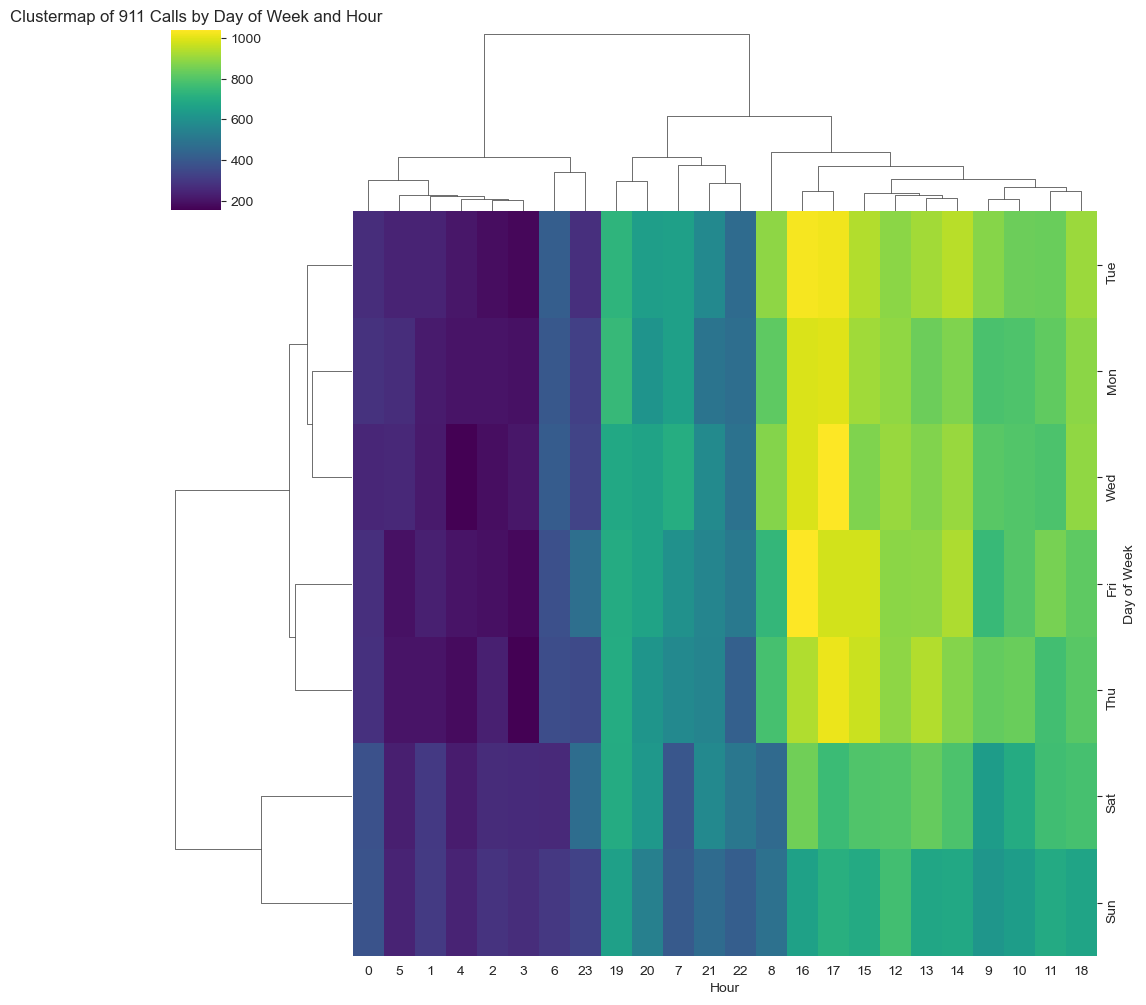

In [61]:
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.clustermap(pivot_df, cmap='viridis')

# Add title
plt.title('Clustermap of 911 Calls by Day of Week and Hour')

# Show the clustermap
plt.show()

## Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.

In [63]:
pivot_month_df = df.pivot_table(index='Day of Week', columns='Month', values='Reason', aggfunc='count')
pivot_month_df

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


<Figure size 1200x800 with 0 Axes>

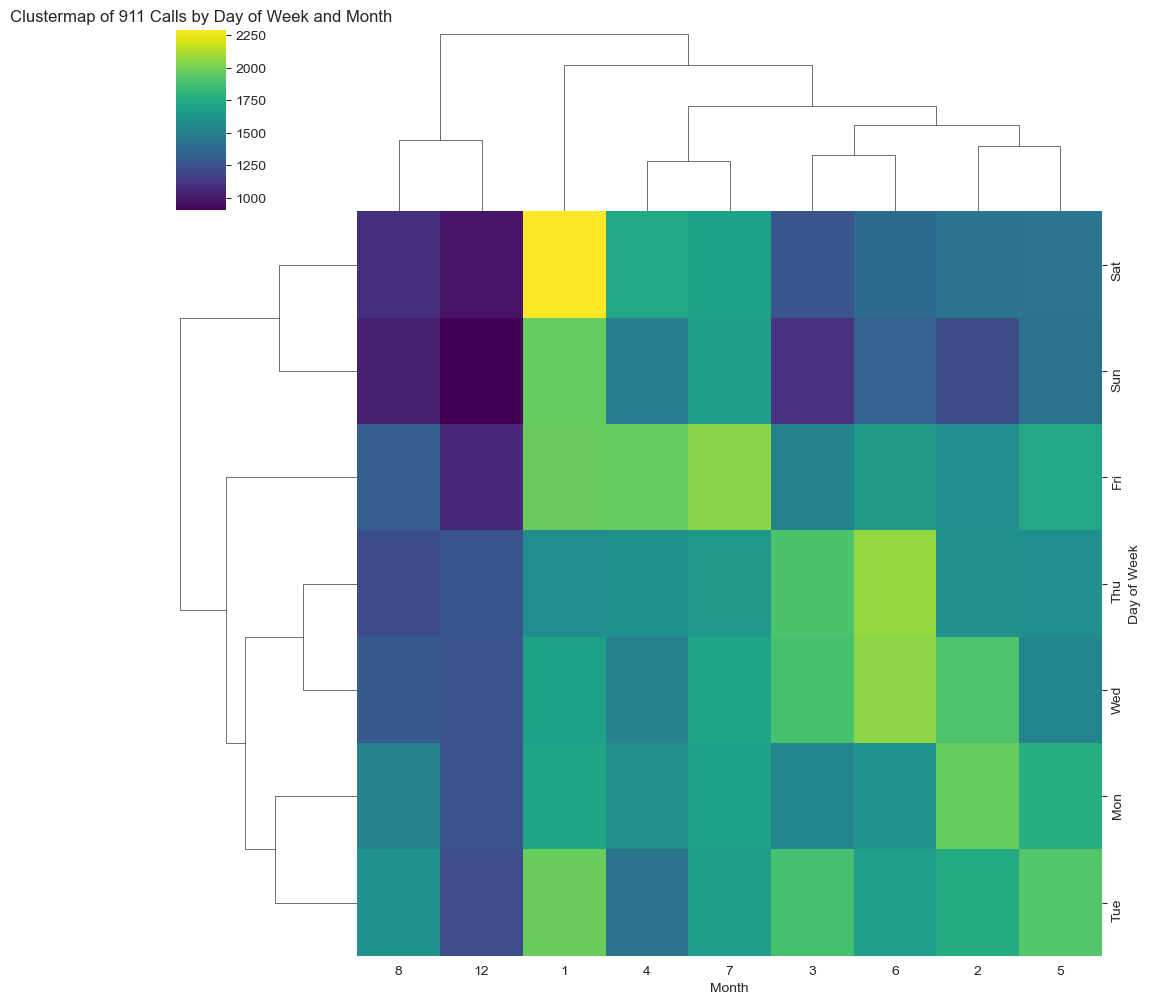

In [64]:
# Create a clustermap for the pivot_month_df
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.clustermap(pivot_month_df, cmap='viridis')

# Add title
plt.title('Clustermap of 911 Calls by Day of Week and Month')

# Show the clustermap
plt.show()

# Get creative and surprise us (Mandatory part):

## In this creative visualization, we use a heatmap to represent the busiest times for 911 calls. Each cell of the heatmap shows the count of calls for a specific hour of the day and a specific day of the week. The color intensity indicates the call volume, with darker colors representing higher call counts. Adjust the figure size, colormap (cmap), and styling as needed for your preference.

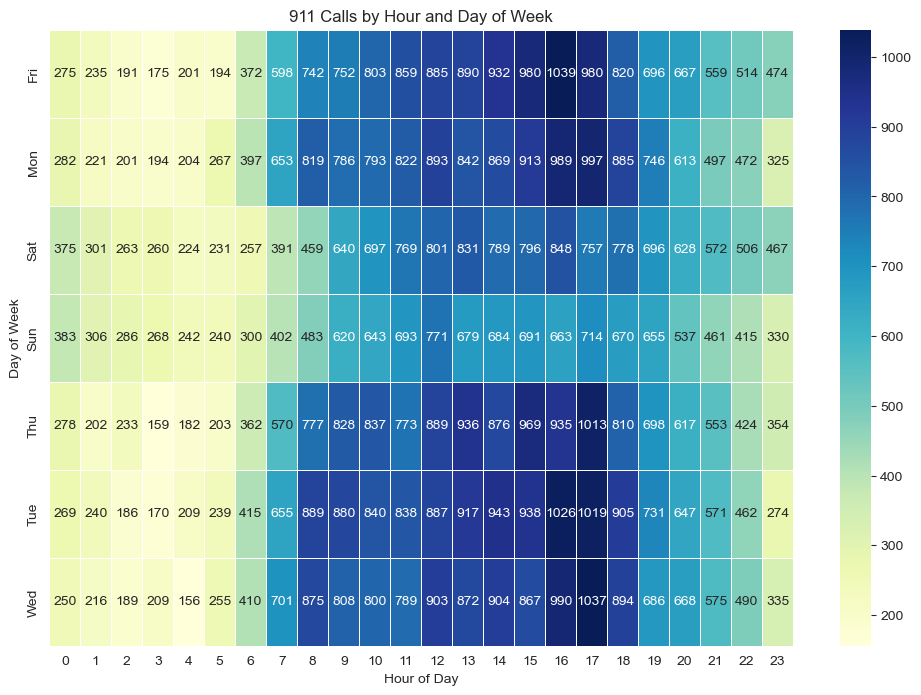

In [65]:
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(pivot_df, cmap='YlGnBu', linewidths=0.5, annot=True, fmt='d')

# Add labels and title
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.title('911 Calls by Hour and Day of Week')

# Show the heatmap
plt.show()